**Deep Agents:** https://docs.langchain.com/oss/python/deepagents/quickstart

In [5]:
import os
from typing import Literal
from tavily import TavilyClient
from deepagents import create_deep_agent
from langchain_openai import ChatOpenAI

In [11]:
tavily_client = TavilyClient()
api_weather = os.getenv("WEATHER_API_KEY")
model = ChatOpenAI(model="gpt-3.5-turbo")

In [12]:
def internet_search(query: str, max_results: int = 5):
    """Run a web search"""
    return tavily_client.search(
        query,
        max_results=max_results,
    )

In [13]:
# System prompt to steer the agent to be an expert researcher
research_instructions = """You are an expert researcher. Your job is to conduct thorough research and then write a polished report.

You have access to an internet search tool as your primary means of gathering information.

## `internet_search`

Use this to run an internet search for a given query. You can specify the max number of results to return, the topic, and whether raw content should be included.
"""

agent = create_deep_agent(
    model=model,
    tools=[internet_search],
    system_prompt=research_instructions
)

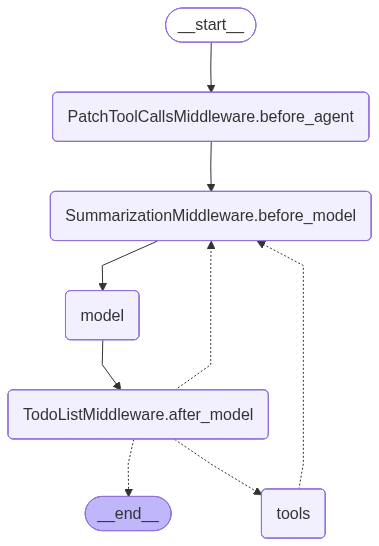

In [19]:
agent

In [17]:
result = agent.invoke({"messages": [{"role": "user", "content": "O que é langgraph? [resposta em pt-br]"}]})

In [18]:
from rich import print

# Print the agent's response
print(result["messages"][-1].content)

O LangGraph é uma biblioteca dentro do ecossistema LangChain que fornece uma estrutura para definir, coordenar e 
executar vários agentes LLM de forma estruturada e eficiente. Ao gerenciar o fluxo de dados e a sequência de 
operações, o LangGraph permite que os desenvolvedores se concentrem na lógica de alto nível de suas aplicações, em 
vez das complexidades da coordenação de agentes. Seja para criar um chatbot que possa lidar com vários tipos de 
solicitações de usuários ou um sistema multiagente que execute tarefas complexas, o LangGraph oferece as 
ferramentas para construir exatamente o que é necessário. O LangGraph simplifica significativamente o 
desenvolvimento de aplicações LLM complexas, fornecendo uma estrutura organizada para gerenciar o estado e 
coordenar as interações dos agentes. O LangGraph Studio é um ambiente de desenvolvimento visual para o framework 
LangGraph da LangChain, simplificando o desenvolvimento de aplicações agênticas complexas construídas com 
componentes da LangChain. 

Fonte: [Tutorial do LangGraph: O que é LangGraph e como 
usá-lo?](https://www.datacamp.com/tutorial/langgraph-tutorial)